# Stock Market Trend Prediction Models

# 1. Data Collection

In [ ]:
# downloading the "Combined_News_DJIA.csv" file
!pip install gdown
!gdown 1tTLkFuUUdJFrwDjjoFpotNsjB9W6y0Od

Downloading...
From: https://drive.google.com/uc?id=1tTLkFuUUdJFrwDjjoFpotNsjB9W6y0Od
To: /content/Combined_News_DJIA.csv
100% 5.62M/5.62M [00:00<00:00, 167MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv("Combined_News_DJIA.csv")
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

# 2. Preprocessing

In [ ]:
# combine all headlines (top1... top25) into 'headlines_combined'
data['headlines_combined'] = data.iloc[:, 2:].apply(lambda row: ' '.join(str(x) for x in row.values if pd.notnull(x)), axis=1)

# split train and test sets according to assignment specifications
train_data = data[(data['Date'] >= '2008-08-08') & (data['Date'] <= '2014-12-31')]
test_data = data[(data['Date'] >= '2015-01-02') & (data['Date'] <= '2016-07-01')]

# extract features and labels from dataframe
X_train, y_train = train_data['headlines_combined'], train_data['Label']
X_test, y_test = test_data['headlines_combined'], test_data['Label']

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # converts to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # removes special characters
    words = word_tokenize(text) # tokenizes text
    words = [word for word in words if word not in stop_words] # removes stopwords
    return ' '.join(words)

# preprocess data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 3. Model Selection and Implementation

## 3.1 Bag of Words (BoW) and simple TF-IDF

Bag of Words Accuracy: 0.43915343915343913
Precision: 0.4537037037037037
Recall: 0.5104166666666666
F1 Score: 0.4803921568627451
Confusion Matrix:
 [[ 68 118]
 [ 94  98]]


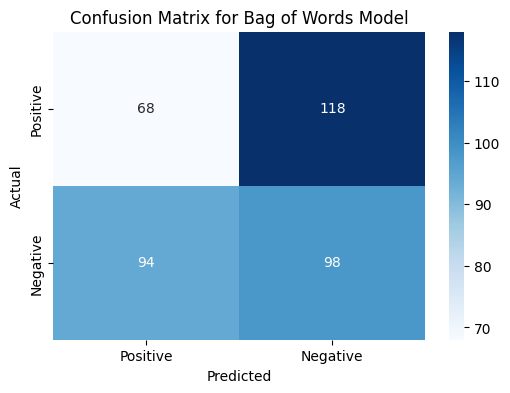

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# convert data from text to Bag of Words feature space
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# building and training logistic regression model
model_bow = LogisticRegression(max_iter=200)
model_bow.fit(X_train_bow, y_train)

# predictions
y_pred_bow = model_bow.predict(X_test_bow)

# evaluation
print("Bag of Words Accuracy:", accuracy_score(y_test, y_pred_bow))
print("Precision:", precision_score(y_test, y_pred_bow))
print("Recall:", recall_score(y_test, y_pred_bow))
print("F1 Score:", f1_score(y_test, y_pred_bow))

conf_matrix = confusion_matrix(y_test, y_pred_bow)
print("Confusion Matrix:\n", conf_matrix)

# visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Bag of Words Model")
plt.show()

TF-IDF Accuracy: 0.4894179894179894
Precision: 0.4985507246376812
Recall: 0.8958333333333334
F1 Score: 0.6405959031657356
Confusion Matrix:
 [[ 13 173]
 [ 20 172]]


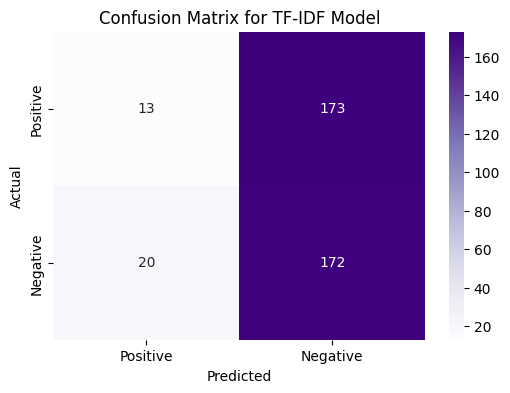

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# convert data from text to TF-IDF feature space
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# building and training logistic regression model
model_tfidf = LogisticRegression(max_iter=200)
model_tfidf.fit(X_train_tfidf, y_train)

# predictions
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# evaluation
print("TF-IDF Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Precision:", precision_score(y_test, y_pred_tfidf))
print("Recall:", recall_score(y_test, y_pred_tfidf))
print("F1 Score:", f1_score(y_test, y_pred_tfidf))

conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix:\n", conf_matrix_tfidf)

# visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt="d", cmap="Purples", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for TF-IDF Model")
plt.show()

## 3.2 Word Embeddings (GloVe)

GloVe Embeddings Model Accuracy: 0.4947089947089947
Precision: 0.501432664756447
Recall: 0.9114583333333334
F1 Score: 0.6469500924214417
Confusion Matrix:
 [[ 12 174]
 [ 17 175]]


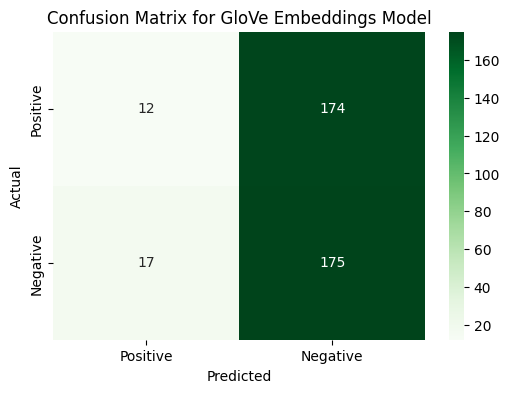

In [ ]:
import gensim.downloader as api
import numpy as np

# load GloVe embeddings
word_vectors = api.load("glove-wiki-gigaword-100")

# convert data from text to glove embeddings feature space
def get_avg_glove(text, model, vector_size):
    words = text.split()
    feature_vec = np.zeros((vector_size,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

X_train_glove = np.array([get_avg_glove(text, word_vectors, 100) for text in X_train])
X_test_glove = np.array([get_avg_glove(text, word_vectors, 100) for text in X_test])

# building and training logistic regression model
model_glove = LogisticRegression(max_iter=200)
model_glove.fit(X_train_glove, y_train)

# predictions
y_pred_glove = model_glove.predict(X_test_glove)

# evaluation
print("GloVe Embeddings Model Accuracy:", accuracy_score(y_test, y_pred_glove))
print("Precision:", precision_score(y_test, y_pred_glove))
print("Recall:", recall_score(y_test, y_pred_glove))
print("F1 Score:", f1_score(y_test, y_pred_glove))

conf_matrix_glove = confusion_matrix(y_test, y_pred_glove)
print("Confusion Matrix:\n", conf_matrix_glove)

# visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_glove, annot=True, fmt="d", cmap="Greens", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GloVe Embeddings Model")
plt.show()

## 3.3 LSTM Model (using word embeddings)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 443ms/step - accuracy: 0.5264 - loss: 0.6922 - val_accuracy: 0.5079 - val_loss: 0.7013
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 434ms/step - accuracy: 0.5360 - loss: 0.6769 - val_accuracy: 0.5106 - val_loss: 0.7107
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.8057 - loss: 0.5990 - val_accuracy: 0.5159 - val_loss: 0.8446
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 422ms/step - accuracy: 0.8933 - loss: 0.3152 - val_accuracy: 0.5026 - val_loss: 0.9991
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 352ms/step - accuracy: 0.9524 - loss: 0.1721 - val_accuracy: 0.5106 - val_loss: 1.1327
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
LSTM Accuracy: 0.5105820105820106
Precision: 0.5165876777251185
Recall: 0.5677083333333334
F1 Score: 0.5409429280397022
Confusion Matrix:
 [[ 84 102]
 [ 83 109]]


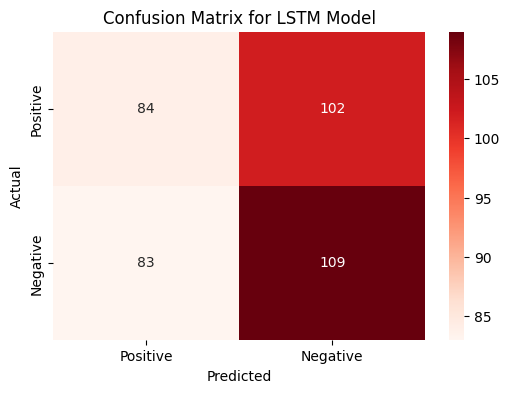

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# prepare sequences (tokenize and pad)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# build LSTM model (embeddings included in the embeddings layer)
model_lstm = Sequential([
    Embedding(5000, 100, input_length=200), # word embeddings included in this layer
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# predictions
y_pred_lstm = model_lstm.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm > 0.5).astype("int32")

# evaluation
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("Precision:", precision_score(y_test, y_pred_lstm))
print("Recall:", recall_score(y_test, y_pred_lstm))
print("F1 Score:", f1_score(y_test, y_pred_lstm))

conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
print("Confusion Matrix:\n", conf_matrix_lstm)

# visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Reds', xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LSTM Model")
plt.show()

## 3.4 Open-source LLMs

In [ ]:
# downloading the "Combined_News_DJIA.csv" file
!pip install gdown
!gdown 1tTLkFuUUdJFrwDjjoFpotNsjB9W6y0Od

In [ ]:
import pandas as pd

data = pd.read_csv("Combined_News_DJIA.csv")
data.head()

In [ ]:
import pandas as pd

# reshape the dataframe
df_melted = pd.melt(
    data,
    id_vars=["Date", "Label"],  # freeze these columns
    value_vars=[col for col in data.columns if col.startswith("Top")],  # unfreeze these columns
    var_name="headline",  # new column name for the old heading
    value_name="actual_headline"  # new column name for the actual content
)

# re-sort the dataframe
df_melted = df_melted.sort_values(by=["Date", "headline"]).reset_index(drop=True)

print(df_melted)

             Date  Label headline  \
0      2008-08-08      0     Top1   
1      2008-08-08      0    Top10   
2      2008-08-08      0    Top11   
3      2008-08-08      0    Top12   
4      2008-08-08      0    Top13   
...           ...    ...      ...   
49720  2016-07-01      1     Top5   
49721  2016-07-01      1     Top6   
49722  2016-07-01      1     Top7   
49723  2016-07-01      1     Top8   
49724  2016-07-01      1     Top9   

                                         actual_headline  
0      b"Georgia 'downs two Russian warplanes' as cou...  
1      b'Did the U.S. Prep Georgia for War with Russia?'  
2      b'Rice Gives Green Light for Israel to Attack ...  
3      b'Announcing:Class Action Lawsuit on Behalf of...  
4      b"So---Russia and Georgia are at war and the N...  
...                                                  ...  
49720  100+ Nobel laureates urge Greenpeace to stop o...  
49721  Brazil: Huge spike in number of police killing...  
49722  Austria's highest

In [ ]:
import pandas as pd
from transformers import pipeline
import time

classifier = pipeline("zero-shot-classification", model="cross-encoder/nli-distilroberta-base", device=0)
topic = "stock market"

output_file = "confidence_scores_with_batches.csv"

def compute_confidence_scores_batch(headlines):
    scores = []
    for headline in headlines:
        if pd.isna(headline) or headline.strip() == "":
            scores.append(0.0)
        else:
            # process valid headline
            result = classifier(headline, candidate_labels=[topic], multi_label=False)
            scores.append(result['scores'][0])  # extract "stock market" confidence
    return scores

# use partially saved file if it exists
try:
    df_melted = pd.read_csv(output_file)
    print(f"Resuming from saved file: {output_file}")
except FileNotFoundError:
    print(f"No saved progress found. Starting fresh.")

# initialize 'confidence_score' column if it doesn't exist
if 'confidence_score' not in df_melted.columns:
    df_melted['confidence_score'] = None

batch_size = 1000
start_time = time.time()

for start in range(0, len(df_melted), batch_size):
    end = start + batch_size
    batch = df_melted[start:end]

    # skip rows that are processed
    if batch['confidence_score'].notnull().all():
        continue

    print(f"Processing batch {start}-{end}...")

    # compute confidence scores
    headlines = batch['actual_headline'].tolist()
    scores = compute_confidence_scores_batch(headlines)

    df_melted.loc[start:end - 1, 'confidence_score'] = scores

    # save progress periodically
    df_melted.to_csv(output_file, index=False)
    print(f"Batch {start}-{end} saved to {output_file}")

# final save
df_melted.to_csv(output_file, index=False)
print(f"All batches processed and saved. Total time: {time.time() - start_time:.2f} seconds")

No saved progress found. Starting fresh.
Processing batch 0-1000...
Batch 0-1000 saved to confidence_scores_with_batches.csv
Processing batch 1000-2000...
Batch 1000-2000 saved to confidence_scores_with_batches.csv
Processing batch 2000-3000...
Batch 2000-3000 saved to confidence_scores_with_batches.csv
Processing batch 3000-4000...
Batch 3000-4000 saved to confidence_scores_with_batches.csv
Processing batch 4000-5000...
Batch 4000-5000 saved to confidence_scores_with_batches.csv
Processing batch 5000-6000...
Batch 5000-6000 saved to confidence_scores_with_batches.csv
Processing batch 6000-7000...
Batch 6000-7000 saved to confidence_scores_with_batches.csv
Processing batch 7000-8000...
Batch 7000-8000 saved to confidence_scores_with_batches.csv
Processing batch 8000-9000...
Batch 8000-9000 saved to confidence_scores_with_batches.csv
Processing batch 9000-10000...
Batch 9000-10000 saved to confidence_scores_with_batches.csv
Processing batch 10000-11000...
Batch 10000-11000 saved to conf